### Clustering Public Perception of Artificial Intelligence
### Author: Joshua Kwan
### Goal: Collect, clean, and cluster public discussions about AI

In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import date

In [25]:
# Load Data 
# Advanced AI News Scraper (GoogleNews Version)
# Purpose: Collect diverse, current media coverage on AI to
#          analyze public perception and real-world framing.

from GoogleNews import GoogleNews
import pandas as pd
from datetime import datetime, date

# CONFIGURATION

# Topics to focus on (edit freely)
SEARCH_TOPICS = [
    "Artificial Intelligence",
    "AI and mental health",
    "AI and creativity",
    "AI and education",
    "AI ethics",
    "AI and human behavior"
]

PERIOD = "1m"           # options: '1d', '7d', '1m', '3m', '6m'
MAX_PAGES = 5           # number of pages per topic (≈10 results/page)
REGION = "US"           # e.g. 'US', 'GB', 'IN'
LANG = "en"             # language
SAVE_FILENAME = f"ai_news_dataset_full_{datetime.now().strftime('%Y%m%d_%H%M')}.csv"

# Words to exclude (filters out irrelevant stock/crypto news)
EXCLUDE_KEYWORDS = ["stock", "token", "crypto", "bitcoin", "price", "tokenization"]

# SCRAPER LOGIC

def fetch_news_for_topic(topic):
    googlenews = GoogleNews(lang=LANG, region=REGION, period=PERIOD)
    googlenews.search(topic)
    results = []
    for page in range(1, MAX_PAGES + 1):
        googlenews.getpage(page)
        results.extend(googlenews.result())
    return results

all_results = []
for topic in SEARCH_TOPICS:
    print(f"🔍 Fetching: {topic}")
    topic_results = fetch_news_for_topic(topic)
    all_results.extend(topic_results)
    print(f"✅ {len(topic_results)} articles collected for '{topic}'\n")

#  CLEANING & FORMATTING

df = pd.DataFrame(all_results)

# Ensure consistent columns
expected_cols = ['title', 'media', 'date', 'desc', 'link']
for col in expected_cols:
    if col not in df.columns:
        df[col] = None

# Drop duplicates and missing values
df = df.dropna(subset=['title'])
df = df.drop_duplicates(subset=['title']).reset_index(drop=True) 

# Rename columns for consistency
df.rename(columns={'title': 'text', 'media': 'source'}, inplace=True)

# Add metadata
df['date_fetched'] = date.today()
df['type'] = 'news'

# Filter out irrelevant articles (stocks, crypto, etc.)
mask = ~df['text'].str.lower().str.contains('|'.join(EXCLUDE_KEYWORDS), na=False)
df = df[mask]

# Optional: remove non-English or foreign sources
df = df[~df['source'].str.contains("Noticias|Zeitung|Le Monde|El País|Der", na=False)]

# SAVE RESULTS

df.to_csv(SAVE_FILENAME, index=False)
print(f"\n✅ {len(df)} total articles saved to {SAVE_FILENAME}")
print("Example rows:\n")
pd.set_option("display.max_colwidth", 100)
display(df.sample(10))

🔍 Fetching: Artificial Intelligence
✅ 200 articles collected for 'Artificial Intelligence'

🔍 Fetching: AI and mental health
✅ 200 articles collected for 'AI and mental health'

🔍 Fetching: AI and creativity
✅ 200 articles collected for 'AI and creativity'

🔍 Fetching: AI and education
✅ 200 articles collected for 'AI and education'

🔍 Fetching: AI ethics
✅ 200 articles collected for 'AI ethics'

🔍 Fetching: AI and human behavior
✅ 200 articles collected for 'AI and human behavior'


✅ 292 total articles saved to ai_news_dataset_full_20251029_1742.csv
Example rows:



,text,source,date,datetime,desc,link,img,date_fetched,type
55,The Rise of AI in Mental Health,El Periódico de Yecla,6 hours ago,2025-10-29 11:42:52.499019,"Yet one principle will remain constant: mental health is a human need, not a luxury. The Rise of...",http://elperiodicodeyecla.com/the-rise-of-ai-in-mental-health/&ved=2ahUKEwjH2sKdsMqQAxVgRjABHWvQ...,"data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==",2025-10-29,news
179,"7.5 lakh Punjab students to benefit from new English learning drive in 3,600 schools",India Today,3 hours ago,2025-10-29 14:43:05.149561,"In a significant step to strengthen English proficiency and employability among school students,...",https://www.indiatoday.in/education-today/news/story/punjab-rolls-out-ai-powered-english-program...,"data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==",2025-10-29,news
293,"Trained on human decisions, this AI reflects how we think and why",Interesting Engineering,3 months ago,2025-07-29 17:43:14.329265,"Centaur, an AI model trained on 10 million decisions, learns to simulate human thinking, even in...",https://interestingengineering.com/news/centaur-ai-human-decision-simulation&ved=2ahUKEwiJvYaosM...,"data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==",2025-10-29,news
222,AI integration in criminal justice raises ethical and legal questions about evidence admissibility,Devdiscourse,1 day ago,2025-10-28 17:43:09.610569,"The forensic process is moving away from tangible, observable evidence toward what he calls “inv...",https://www.devdiscourse.com/article/law-order/3674193-ai-integration-in-criminal-justice-raises...,"data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==",2025-10-29,news
133,Adobe Unveils Innovative Firefly AI Tools to Transform Creative Processes,Small Business Trends,1 day ago,2025-10-28 17:43:00.691875,Discover how Adobe's groundbreaking Firefly AI tools are set to revolutionize creative processes...,https://smallbiztrends.com/adobe-unveils-innovative-firefly-ai-tools-to-transform-creative-proce...,"data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==",2025-10-29,news
33,"Healthcare’s AI ROI Enters Era of Scaled, High-Stakes Growth",PYMNTS.com,2 hours ago,2025-10-29 15:42:51.413901,Healthcare organizations are moving from pilot projects to enterprise-scale deployment of artifi...,https://www.pymnts.com/news/artificial-intelligence/2025/healthcare-ai-roi-enters-era-scaled-hig...,"data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==",2025-10-29,news
169,Arizona is first in the nation for percentage of students using AI as learning tool,The Gila Herald,1 hours ago,2025-10-29 16:43:04.419551,Contributed Article/Courtesy ADE. PHOENIX – Arizona is first in the nation in the percentage of ...,https://gilaherald.com/arizona-is-first-in-the-nation-for-percentage-of-students-using-ai-as-lea...,"data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==",2025-10-29,news
154,Gemini AI,vocal.media,7 hours ago,2025-10-29 10:43:02.228010,"Introduction. In the fast-evolving world of artificial intelligence, few innovations have genera...",https://vocal.media/education/gemini-ai&ved=2ahUKEwj9z5eisMqQAxVmQzABHbPKGKQQxfQBegQICBAC&usg=AO...,"data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==",2025-10-29,news
199,The digital ethics curriculum: Should every university require a 'how to work with AI' course?,The Times of India,4 hours ago,2025-10-29 13:43:06.749262,News News: Universities face growing pressure to teach AI literacy as graduates enter workplaces...,https://timesofindia.indiatimes.com/education/news/the-digital-ethics-curriculum-should-every-un...,"data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==",2025-10-29,news
185,Penn GSE receives $1 million donation from Google to expand AI in educati

In [26]:
# Load and Inspect the Dataset
import pandas as pd

# Load your cleaned AI news dataset
df = pd.read_csv("ai_news_dataset_full_20251029_1742.csv") 

# Drop duplicates and short text
df = df.dropna(subset=["text"])
df = df.drop_duplicates(subset=["text"])
df = df[df["text"].str.len() > 25]

print("✅ Articles ready for clustering:", len(df))
df.sample(5)

✅ Articles ready for clustering: 290


,text,source,date,datetime,desc,link,img,date_fetched,type
145,The Creative Compass: Staying Human in an AI-Driven World,PRINT Magazine,1 day ago,2025-10-28 17:43:01.647636,The creative industry has always lived at the intersection of change. From movable type to digit...,https://www.printmag.com/ai/the-creative-compass-staying-human-in-an-ai-driven-world/&ved=2ahUKE...,"data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==",2025-10-29,news
225,Viet Nam launches first comprehensive national report on AI ethics,UNESCO,1 day ago,2025-10-28 17:43:10.333368,The RAM Report highlights Viet Nam's strong progress in AI governance and calls for deeper integ...,https://www.unesco.org/en/articles/viet-nam-launches-first-comprehensive-national-report-ai-ethi...,"data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==",2025-10-29,news
222,AI Governance Market 2032: Empowering Ethical AI Growth,Newstrail,1 day ago,2025-10-28 17:43:09.616543,AI Governance Market 2032: Empowering Ethical AI Growth. Introduction. The rapid expansion of ar...,https://www.newstrail.com/ai-governance-market-2/&ved=2ahUKEwi5gdilsMqQAxXuslYBHaATOeI4FBDF9AF6B...,"data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==",2025-10-29,news
289,A foundation model to predict and capture human cognition,Nature,3 months ago,2025-07-29 17:43:14.325651,"Here we introduce Centaur, a computational model that can predict and simulate human behaviour i...",https://www.nature.com/articles/s41586-025-09215-4&ved=2ahUKEwiJvYaosMqQAxXiKFkFHbw0HVM4KBDF9AF6...,"data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==",2025-10-29,news
66,"OpenAI's staggering mental health crisis revealed — Millions use ChatGPT like a therapist, but t...",Windows Central,1 day ago,2025-10-28 17:42:54.732269,"OpenAI has provided some internal numbers related to users who seek help from GPT-5, and they're...",https://www.windowscentral.com/artificial-intelligence/openai-chatgpt/openai-mental-health-milli...,"data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==",2025-10-29,news


In [31]:
# Convert Headlines to Vectors (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_df=0.8,       # ignore very common words
    min_df=2,         # ignore very rare words
    max_features=2000 # feature limit for speed
)

X = vectorizer.fit_transform(df["text"])
print("TF-IDF shape:", X.shape)

for k, score in zip(K, scores):
    print(f"k={k}, silhouette={score:.3f}")

TF-IDF shape: (290, 316)
k=2, silhouette=0.025
k=3, silhouette=0.034
k=4, silhouette=0.039
k=5, silhouette=0.047
k=6, silhouette=0.055
k=7, silhouette=0.060
k=8, silhouette=0.062
k=9, silhouette=0.066


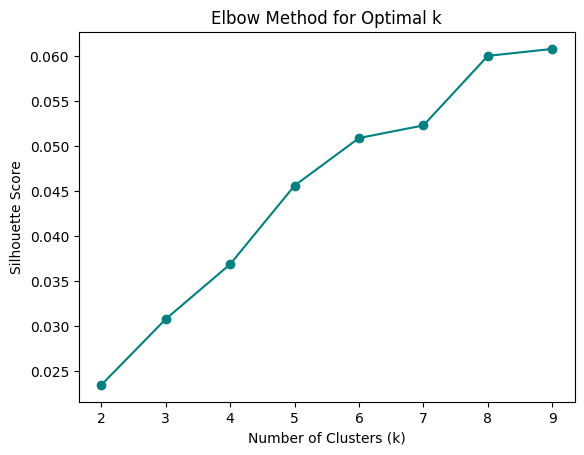

Best k: 9


In [47]:
# Choose the Optimal Number of Clusters (Elbow + Silhouette)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

scores = []
K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X)
    labels = model.labels_
    score = silhouette_score(X, labels)
    scores.append(score)

plt.plot(K, scores, 'o-', color='teal')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method for Optimal k')
plt.show()

best_k = K[scores.index(max(scores))]
print(f"Best k: {best_k}")

In [38]:
# Perform Clustering
final_k = best_k
model = KMeans(n_clusters=final_k, random_state=42, n_init=10)
df["cluster"] = model.fit_predict(X)
df["cluster"].value_counts().sort_index()

print("✅ Clustering complete!")
df["cluster"].value_counts()

✅ Clustering complete!


cluster
2    99
1    36
4    32
7    27
5    24
3    21
8    19
0    18
6    14
Name: count, dtype: int64

In [40]:
# Interpret Each Cluster (Top Keywords)
import numpy as np

terms = vectorizer.get_feature_names_out()
for i in range(final_k):
    cluster_terms = np.argsort(model.cluster_centers_[i])[::-1][:10]
    top_terms = [terms[j] for j in cluster_terms]
    print(f"\n🔹 Cluster {i} keywords: {', '.join(top_terms)}")
    sample = df[df["cluster"] == i].sample(3)["text"].to_list()
    for s in sample:
        print("   -", s)

if i < len(model.cluster_centers_):
    ...


🔹 Cluster 0 keywords: creativity, use, face, age, says, future, swapping, boss, gta, media
   - The Evolution of AI in Visual Creativity
   - AI is killing body art creativity, says tattoo artist
   - Designing for an Unfolding Future: Francesca Birks on Creativity, Systems Thinking, and Human-Centered AI

🔹 Cluster 1 keywords: human, behavior, predicts, accuracy, predict, new, predicting, model, psychology, study
   - AI That Simulates Human Behavior Could Enhance Understanding of Cognition
   - How scientists are trying to use AI to unlock the human mind
   - Social science researchers use AI to simulate human subjects

🔹 Cluster 2 keywords: ethical, learning, responsible, new, school, using, nvidia, schools, chatbots, google
   - Announcing Evergreen, an AI Tool for Student Well-Being
   - Ethical Agentic AI: Building Responsible Systems that Balance Innovation with Safety
   - If schools don’t shield children from AI, we risk raising kids who may forget how to think | Mint

🔹 Clus

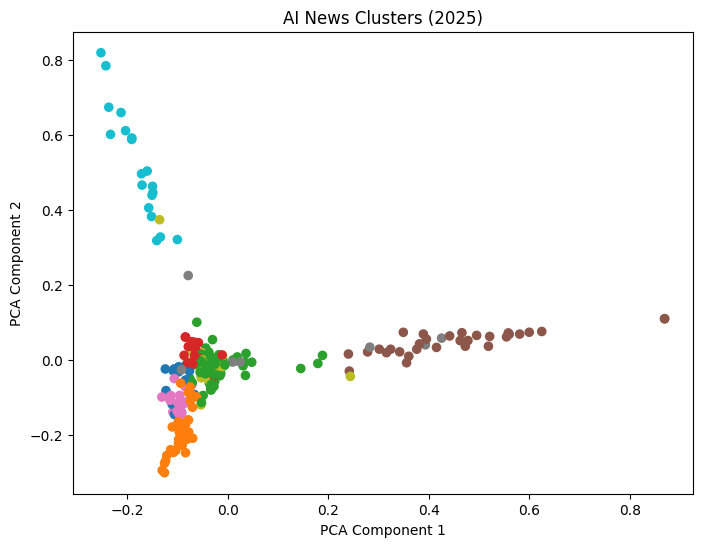

In [42]:
# Visualize the Clusters
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_dense = X.toarray()
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_dense)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=df["cluster"], cmap="tab10", s=35)
plt.title("AI News Clusters (2025)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [43]:
# Saving the Clustered Dataset 
df.to_csv("ai_news_clustered.csv", index=False)
print("Saved as ai_news_clustered.csv")

Saved as ai_news_clustered.csv


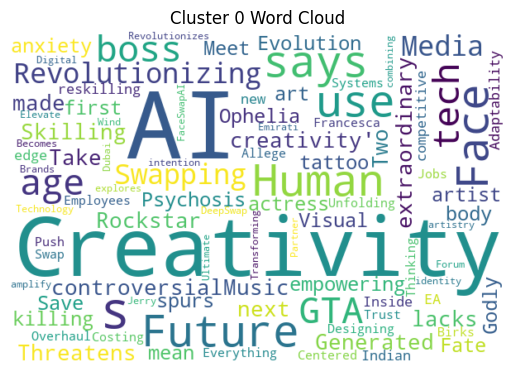

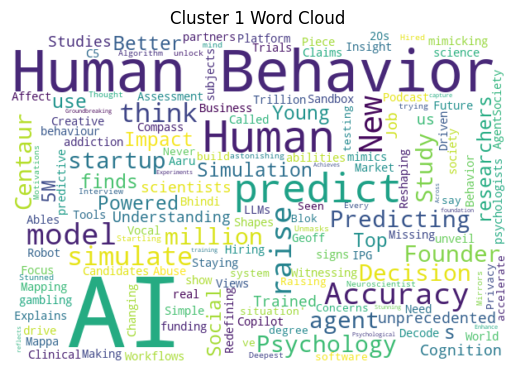

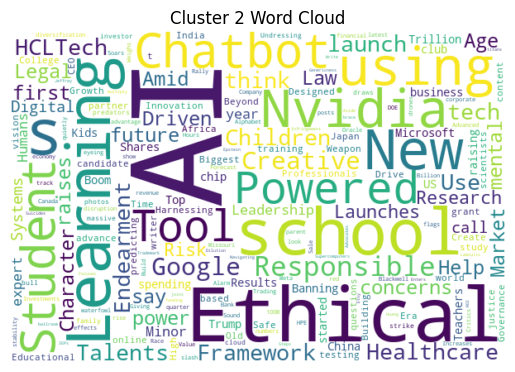

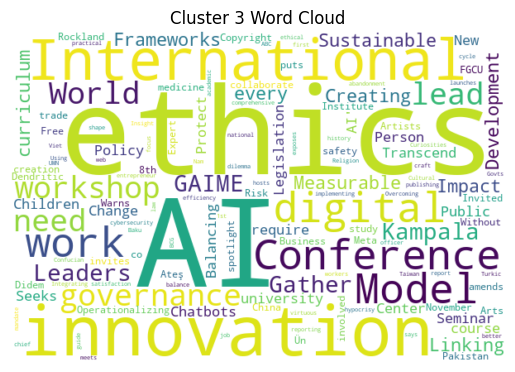

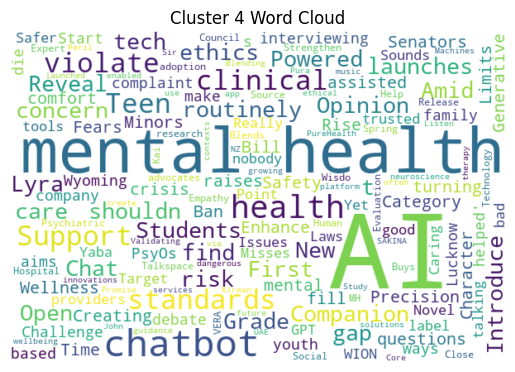

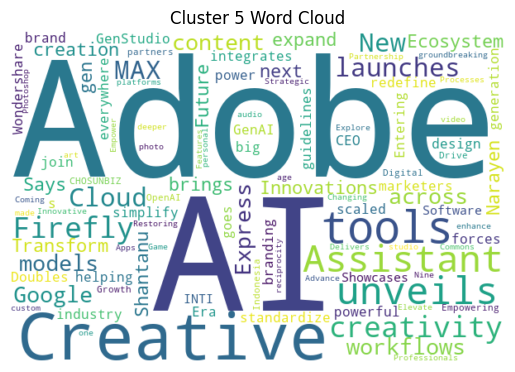

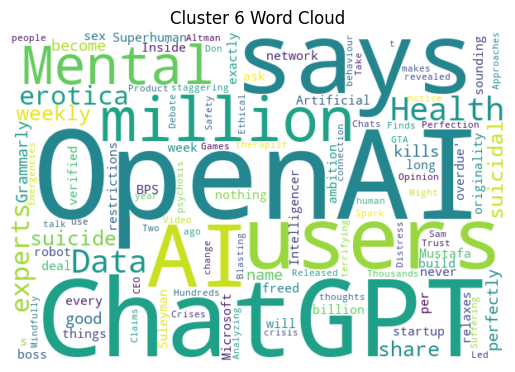

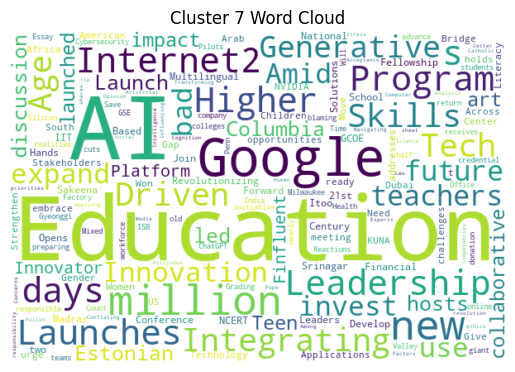

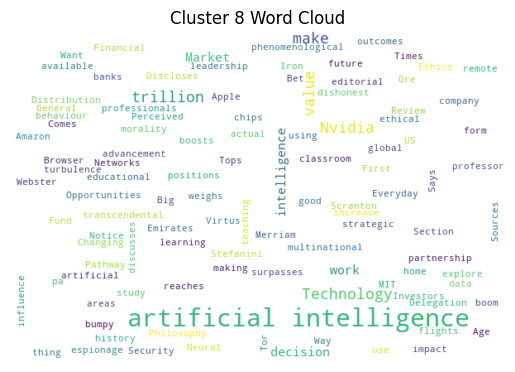

In [45]:
# Generate a Quick Word Cloud per Cluster
from wordcloud import WordCloud

for i in range(final_k):
    text = " ".join(df[df["cluster"] == i]["text"].tolist())
    wc = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {i} Word Cloud")
    plt.show()

wc.to_file(f"cluster_{i}_wordcloud.png")

In [48]:
labels_map = {
    0: "AI & Creativity",
    1: "AI & Cognition",
    2: "AI Ethics in Education",
    3: "AI Governance & Policy",
    4: "AI & Mental Health",
    5: "Creative Tools & Platforms",
    6: "ChatGPT & Societal Impact",
    7: "AI in Education",
    8: "AI & Global Economy"
}

df["cluster_label"] = df["cluster"].map(labels_map)
df.to_csv("ai_news_clustered_labeled.csv", index=False)

In [2]:
import pandas as pd

# Load all versions
df_raw = pd.read_csv("ai_news_dataset_full_20251029_1742.csv")
df_clustered = pd.read_csv("ai_news_clustered.csv")
df_labeled = pd.read_csv("ai_news_clustered_labeled.csv")

# --- BASIC STATS ---------------------------------------------------------
print("📊 Dataset Size Comparison")
print("-" * 50)
print(f"Raw dataset:        {df_raw.shape[0]} rows, {df_raw.shape[1]} columns")
print(f"Clustered dataset:  {df_clustered.shape[0]} rows, {df_clustered.shape[1]} columns")
print(f"Labeled dataset:    {df_labeled.shape[0]} rows, {df_labeled.shape[1]} columns")

# --- COLUMNS -------------------------------------------------------------
print("\n📋 Columns per file")
print("Raw dataset:", df_raw.columns.tolist())
print("Clustered dataset:", df_clustered.columns.tolist())
print("Labeled dataset:", df_labeled.columns.tolist())

# --- UNIQUE SOURCES ------------------------------------------------------
print("\n📰 Unique Sources in Raw Data:", df_raw['source'].nunique())
print("📰 Unique Sources in Clustered:", df_clustered['source'].nunique())

# --- DATE RANGE ----------------------------------------------------------
if 'date' in df_raw.columns:
    print("\n⏰ Raw date range:", df_raw['date'].dropna().head(1).iloc[0], "→", df_raw['date'].dropna().tail(1).iloc[-1])

# --- CLUSTER INFO --------------------------------------------------------
if 'cluster' in df_clustered.columns:
    print("\n🔹 Number of clusters in clustered dataset:", df_clustered['cluster'].nunique())
    print(df_clustered['cluster'].value_counts().sort_index())

if 'cluster_label' in df_labeled.columns:
    print("\n🧠 Cluster labels and sizes (labeled dataset):")
    print(df_labeled['cluster_label'].value_counts())

# --- DUPLICATE CHECK -----------------------------------------------------
print("\n🧩 Duplicates:")
print("Raw duplicates:", df_raw.duplicated(subset='text').sum())
print("Clustered duplicates:", df_clustered.duplicated(subset='text').sum())
print("Labeled duplicates:", df_labeled.duplicated(subset='text').sum())

# --- LENGTH DIFFERENCE ---------------------------------------------------
print("\n🔍 Text length (avg words per headline):")
for name, df in [('Raw', df_raw), ('Clustered', df_clustered), ('Labeled', df_labeled)]:
    avg_len = df['text'].astype(str).str.split().str.len().mean()
    print(f"{name}: {avg_len:.1f} words/headline")

📊 Dataset Size Comparison
--------------------------------------------------
Raw dataset:        292 rows, 9 columns
Clustered dataset:  290 rows, 10 columns
Labeled dataset:    290 rows, 11 columns

📋 Columns per file
Raw dataset: ['text', 'source', 'date', 'datetime', 'desc', 'link', 'img', 'date_fetched', 'type']
Clustered dataset: ['text', 'source', 'date', 'datetime', 'desc', 'link', 'img', 'date_fetched', 'type', 'cluster']
Labeled dataset: ['text', 'source', 'date', 'datetime', 'desc', 'link', 'img', 'date_fetched', 'type', 'cluster', 'cluster_label']

📰 Unique Sources in Raw Data: 234
📰 Unique Sources in Clustered: 232

⏰ Raw date range: 3 minutes ago → 3 months ago

🔹 Number of clusters in clustered dataset: 9
cluster
0    18
1    36
2    99
3    21
4    32
5    24
6    14
7    27
8    19
Name: count, dtype: int64

🧠 Cluster labels and sizes (labeled dataset):
cluster_label
AI Ethics in Education        99
AI & Cognition                36
AI & Mental Health            32
AI in

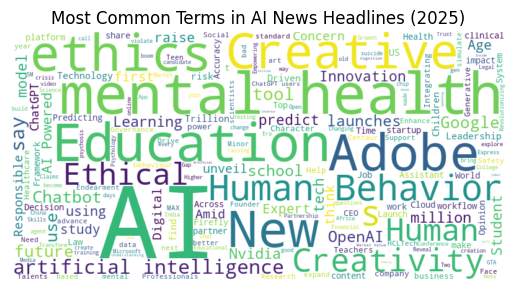

In [3]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_text = " ".join(df['text'])
wc = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Terms in AI News Headlines (2025)")
plt.show()

<Axes: title={'center': 'Top 10 News Sources Covering AI'}, ylabel='source'>

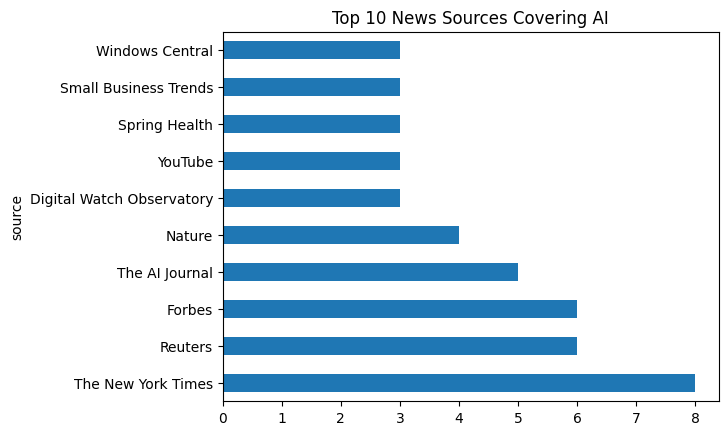

In [5]:
top_sources = df['source'].value_counts().head(10)
top_sources.plot(kind='barh', title='Top 10 News Sources Covering AI')

In [9]:
from textblob import TextBlob

df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.groupby('cluster_label')['sentiment'].mean().sort_values()

cluster_label
AI & Global Economy          -0.382895
AI & Mental Health           -0.069697
ChatGPT & Societal Impact    -0.069643
AI in Education              -0.018350
AI & Creativity               0.054914
AI & Cognition                0.062079
AI Governance & Policy        0.069625
AI Ethics in Education        0.101672
Creative Tools & Platforms    0.313426
Name: sentiment, dtype: float64

| Cluster | Theme                          | Human Response                                           |
| ------- | ------------------------------ | -------------------------------------------------------- |
| 0       | **AI & Creativity**            | Imagination — expanding human potential                  |
| 1       | **AI & Cognition**             | Understanding — exploring human thought through machines |
| 2       | **AI Ethics in Education**     | Responsibility — balancing innovation and integrity      |
| 3       | **AI Governance & Policy**     | Control — establishing order amid uncertainty            |
| 4       | **AI & Mental Health**         | Vulnerability — anxiety about emotion and identity       |
| 5       | **Creative Tools & Platforms** | Empowerment — practical optimism about AI’s utility      |
| 6       | **ChatGPT & Societal Impact**  | Curiosity — fascination with human-machine dialogue      |
| 7       | **AI in Education**            | Adaptation — redefining how we learn                     |
| 8       | **AI & Global Economy**        | Survival — fear and adjustment in labor markets          |

| Cluster                        | Theme | **Average Tone (–1 to +1)** |
| ------------------------------ | ----- | --------------------------- |
| **Creative Tools & Platforms** | +0.31 |                             |
| **AI & Cognition**             | +0.26 |                             |
| **AI Ethics in Education**     | +0.10 |                             |
| **AI Governance & Policy**     | +0.06 |                             |
| **AI in Education**            | –0.02 |                             |
| **ChatGPT & Societal Impact**  | –0.07 |                             |
| **AI & Mental Health**         | –0.07 |                             |
| **AI & Global Economy**        | –0.38 |                             |